In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
happiness = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

## Univariate Analysis

In [4]:
happiness.Country.value_counts()

Country
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: count, Length: 158, dtype: int64

In [5]:
happiness.duplicated().sum()

0

In [6]:
round(happiness.Region.value_counts(normalize=True)*100,1)

Region
Sub-Saharan Africa                 25.3
Central and Eastern Europe         18.4
Latin America and Caribbean        13.9
Western Europe                     13.3
Middle East and Northern Africa    12.7
Southeastern Asia                   5.7
Southern Asia                       4.4
Eastern Asia                        3.8
North America                       1.3
Australia and New Zealand           1.3
Name: proportion, dtype: float64

In [7]:
numerical_features = happiness.select_dtypes(include=np.number)
numerical_features.drop(['Happiness Rank','Standard Error','Dystopia Residual'],axis=1,inplace=True)
numerical_features.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


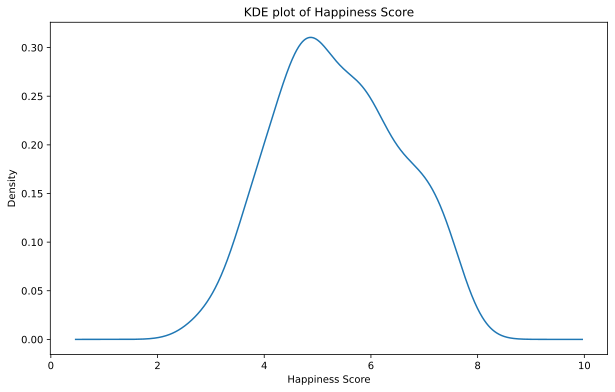

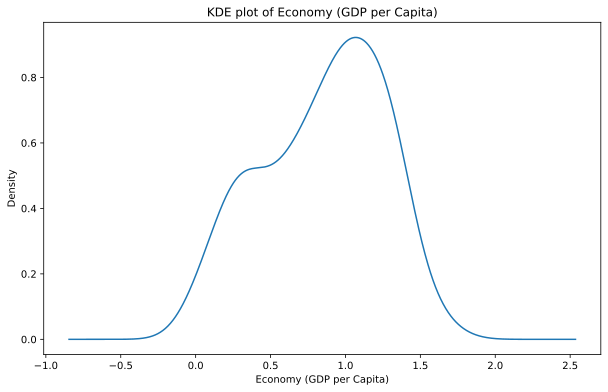

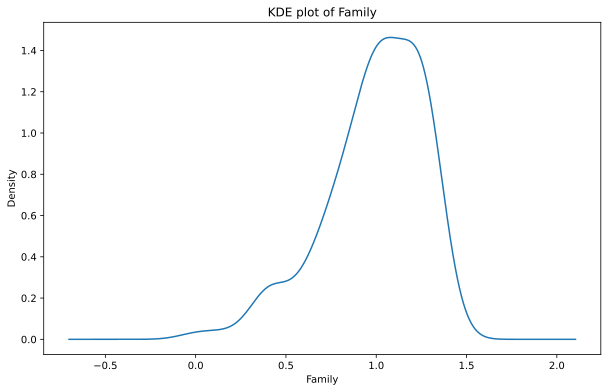

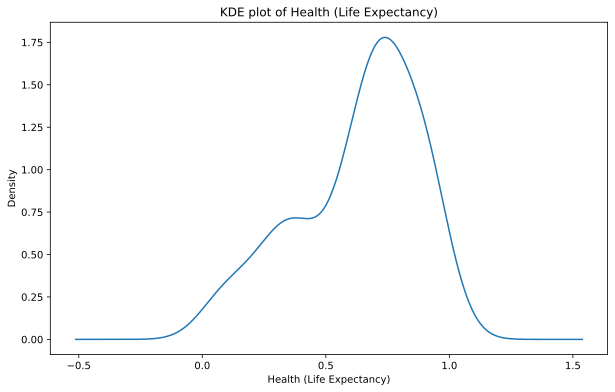

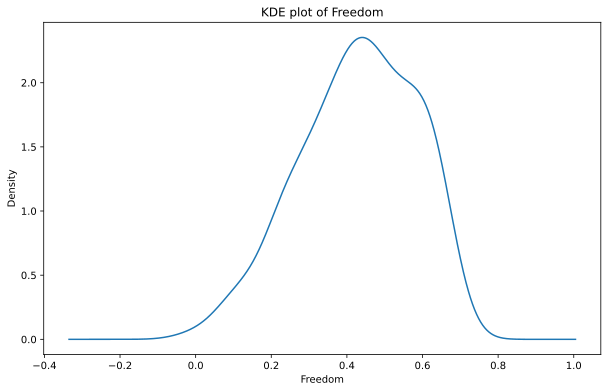

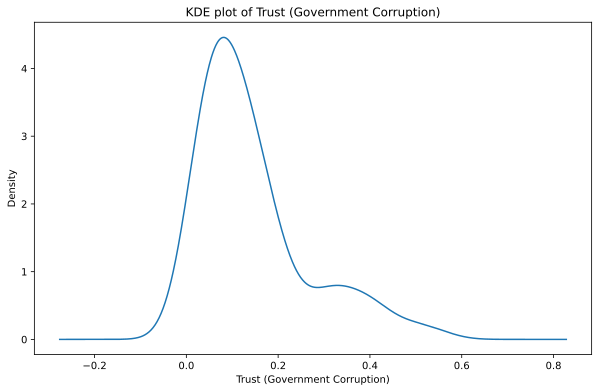

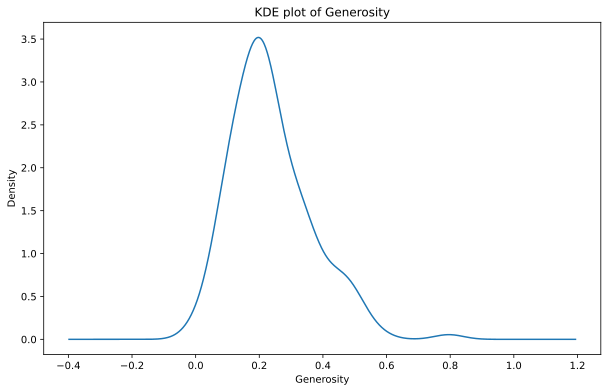

In [8]:
for col in numerical_features.columns:
    plt.figure(figsize=(10,6))
    numerical_features[col].plot.kde()
    plt.xlabel(col)
    plt.title(f'KDE plot of {col}')
    plt.show()

In [13]:
numerical_features.skew().reset_index().rename(columns={'index':'Columns',0:'Skewness'})

,Columns,Skewness
0,Happiness Score,0.097769
1,Economy (GDP per Capita),-0.317575
2,Family,-1.006893
3,Health (Life Expectancy),-0.705328
4,Freedom,-0.413462
5,Trust (Government Corruption),1.385463
6,Generosity,1.001961


In [14]:
numerical_features.kurt().reset_index().rename(columns={'index':'Columns',0:'Kurtosis'})

,Columns,Kurtosis
0,Happiness Score,-0.776075
1,Economy (GDP per Capita),-0.866986
2,Family,0.918819
3,Health (Life Expectancy),-0.393935
4,Freedom,-0.460778
5,Trust (Government Corruption),1.384787
6,Generosity,1.746528


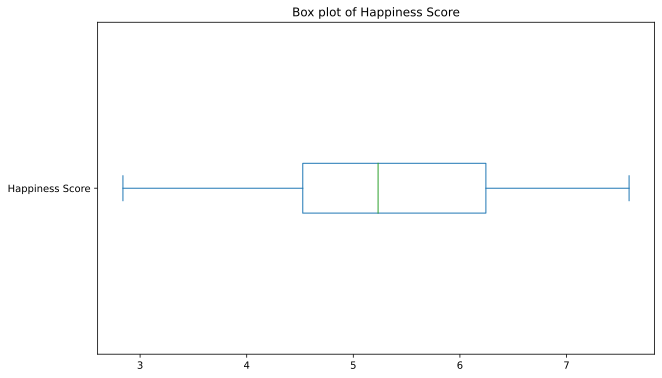

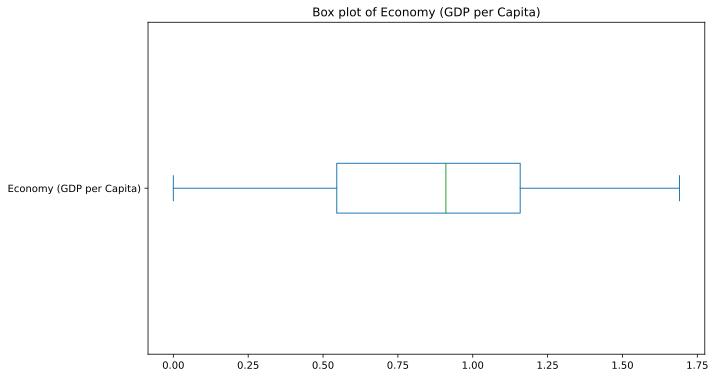

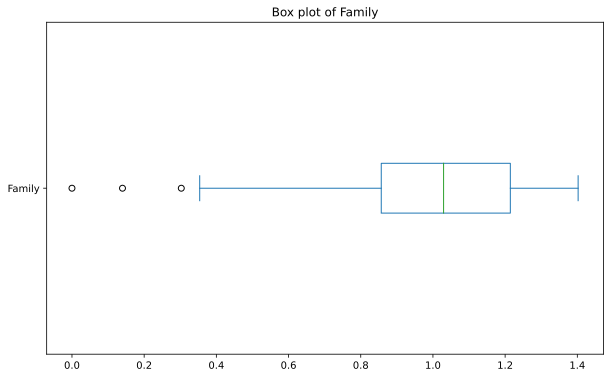

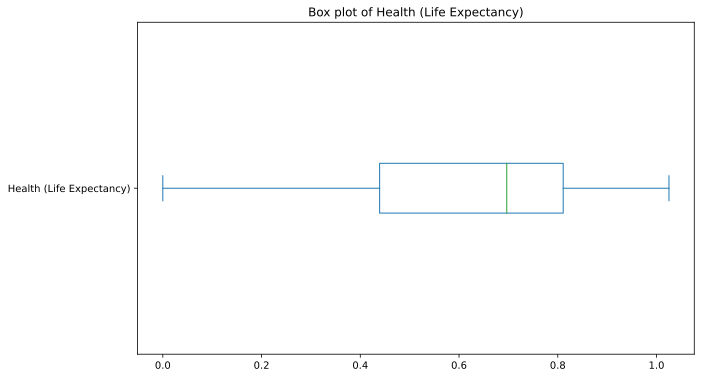

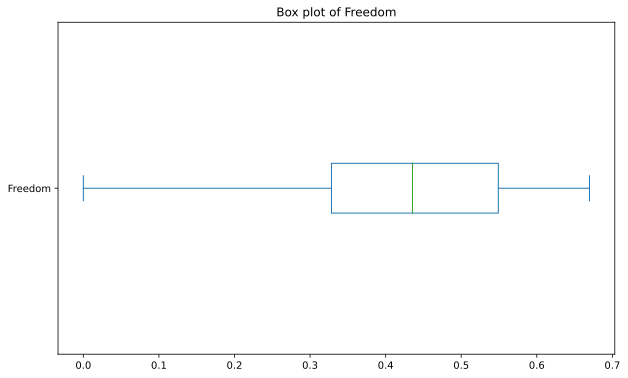

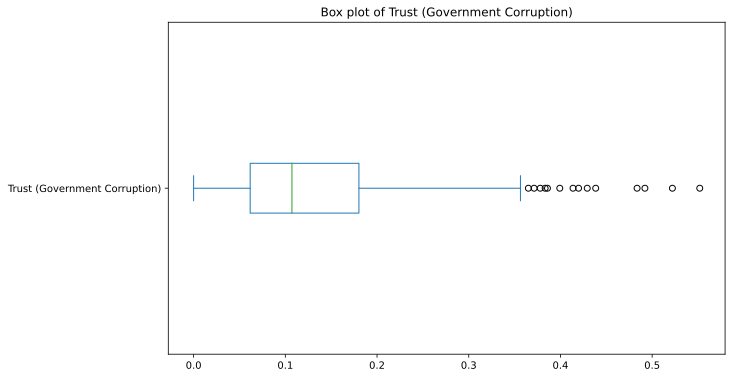

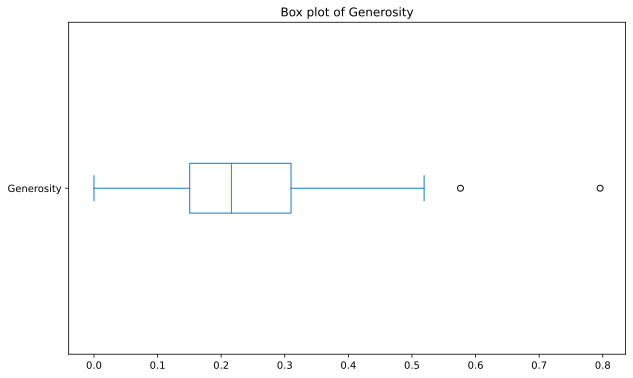

In [22]:
for col in numerical_features.columns:
    plt.figure(figsize=(10,6))
    numerical_features[col].plot.box(vert=False)
    plt.title(f'Box plot of {col}')
    plt.ylabel('')
    plt.show()

## Bivariate Analysis

### Between features

In [24]:
numerical_features.drop(['Happiness Score'],axis=1).corr()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Economy (GDP per Capita),1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465
Family,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513
Health (Life Expectancy),0.816478,0.531104,1.000000,0.360477,0.248335,0.108335
Freedom,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916
Trust (Government Corruption),0.307885,0.205605,0.248335,0.493524,1.000000,0.276123
Generosity,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000


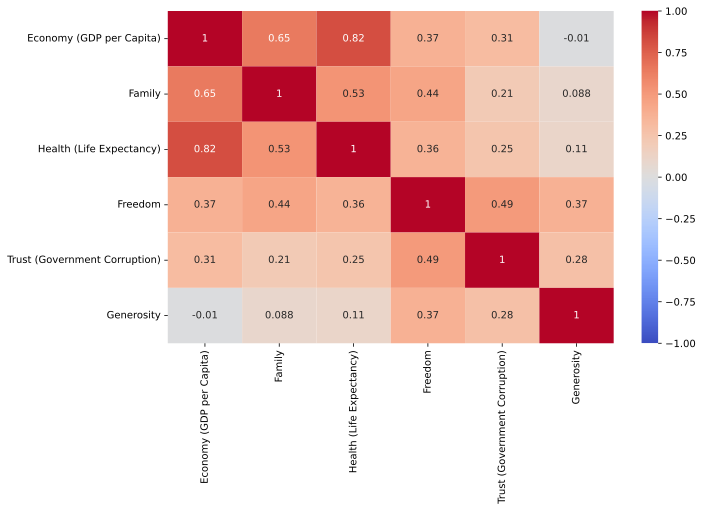

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(numerical_features.drop(['Happiness Score'],axis=1).corr(),annot=True,cmap='coolwarm',vmax=1,vmin=-1);

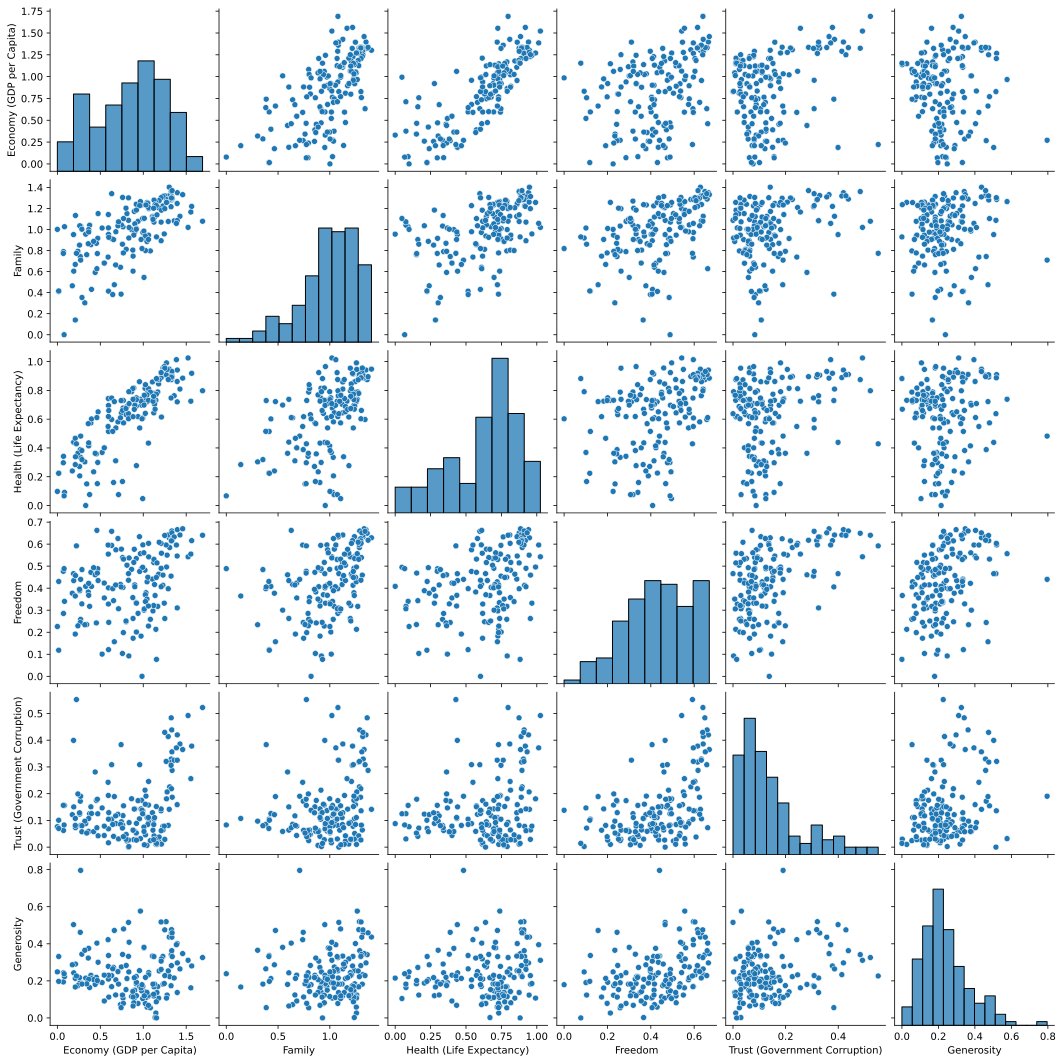

In [31]:
sns.pairplot(numerical_features.drop(['Happiness Score'],axis=1))
plt.show();

In [44]:
def get_VIFs(features):
    vifs=pd.Series()
    for i,col in enumerate(features.columns.values):
        vif=variance_inflation_factor(exog=features,exog_idx=i)
        vifs[col]=vif
    return vifs.sort_values(ascending=False)

get_VIFs(numerical_features.drop(['Happiness Score'],axis=1))

Health (Life Expectancy)         22.342857
Economy (GDP per Capita)         21.016604
Family                           18.671410
Freedom                          15.283001
Generosity                        5.516486
Trust (Government Corruption)     3.454425
dtype: float64

## Feature selection

In [45]:
get_VIFs(numerical_features.drop(['Happiness Score','Health (Life Expectancy)'],axis=1))

Family                           18.355381
Freedom                          15.057460
Economy (GDP per Capita)         10.118721
Generosity                        5.174438
Trust (Government Corruption)     3.418505
dtype: float64